# Project 2 Part 2
## Mitra Iyer
## 11/12/25

### Imports

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time

### Function that scrapes all the webpages from WorldOMeters

In [2]:
import pandas as pd

def get_table_data(soup):
    table = soup.find('table', class_='datatable')
    if not table:
        return pd.DataFrame()

    headers = [] #find headers
    for th in table.find_all('th'):
        headers.append(th.text)
    

    rows = [] #find rows
    for tr in table.tbody.find_all('tr'):
        cols = []
        for td in tr.find_all('td'):
            cols.append(td.text)
        if len(cols) == len(headers):
            rows.append(cols)

    return pd.DataFrame(rows, columns=headers)


### Put URLS into the function and scrape for them - then put the scraped tables into a dictionary

In [3]:
urls = [
    'https://www.worldometers.info/world-population/population-by-country/',
    'https://www.worldometers.info/geography/7-continents/',
    'https://www.worldometers.info/world-population/world-population-by-year/',
    'https://www.worldometers.info/world-population/us-population/',
    'https://www.worldometers.info/world-population/china-population/'
]


data_tables = {} #dictionary for tables

for i, url in enumerate(urls, 1):
    response = requests.get(url)
    if response.status_code == 200:
        soup = bs(response.text, 'html.parser')
        df = get_table_data(soup)
        data_tables[f'table{i}'] = df
    else:
        print(f"Oops! Received status code {response.status_code} for {url}")

### Check all data tables to make sure data is scraped properly

In [4]:
data_tables['table1']

,#,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,India,"1,463,865,525",0.89%,"12,929,734",492,"2,973,190","â495,753",1.94,28.8,37.1%,17.78%
1,2,China,"1,416,096,094",â0.23%,"â3,225,184",151,"9,388,211","â268,126",1.02,40.1,67.5%,17.20%
2,3,United States,"347,275,807",0.54%,"1,849,236",38,"9,147,420","1,230,663",1.62,38.5,82.8%,4.22%
3,4,Indonesia,"285,721,236",0.79%,"2,233,305",158,"1,811,570","â39,509",2.1,30.4,59.6%,3.47%
4,5,Pakistan,"255,219,554",1.57%,"3,950,390",331,"770,880","â1,235,336",3.5,20.6,34.4%,3.10%
...,...,...,...,...,...,...,...,...,...,...,...,...
228,229,Montserrat,"4,359",â0.68%,â30,44,100,â9,1.45,41.6,11.5%,0.000053%
229,230,Falkland Islands,"3,469",â0.03%,â1,0,"12,170",â17,1.7,42.8,68%,0.000042%
230,231,Tokelau,"2,608",4.07%,102,261,10,53,2.57,27.3,,0.000032%
231,232,Niue,"1,821",0.11%,2,7,260,3,2.46,35.7,44.5%,0.000022%


In [5]:
data_tables['table2']

,#,Continent,Population 2025,Area (KmÂ²),Density (P/KmÂ²),World Share
0,1,Asia,"4,835,320,061","31,033,131",156,58.7%
1,2,Africa,"1,549,867,585","29,648,481",52,18.8%
2,3,Europe,"742,556,239","22,134,710",34,9%
3,4,North America,"617,286,638","21,329,947",29,7.5%
4,5,South America,"438,105,376","17,461,112",25,5.3%
5,6,Australia/Oceania,"46,609,644","8,486,460",5,0.6%
6,7,Antarctica,0,"13,720,000",0,0%


In [6]:
data_tables['table3']

,Year,Population,Yearly % Change,Net Change,Density (P/KmÂ²)
0,2025,"8,231,613,070",0.85%,"69,640,498",55
1,2024,"8,161,972,572",0.87%,"70,237,642",55
2,2023,"8,091,734,930",0.88%,"70,327,738",54
3,2022,"8,021,407,192",0.84%,"66,958,801",54
4,2021,"7,954,448,391",0.86%,"67,447,099",53
...,...,...,...,...,...
88,900,"240,000,000",,,2
89,800,"220,000,000",,,1
90,700,"210,000,000",,,1
91,600,"200,000,000",,,1


In [7]:
data_tables['table4']

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/KmÂ²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,U.S. Global Rank
0,2025,"347,275,807",0.54%,"1,849,236","1,230,663",38.5,1.62,38,82.8%,"287,421,363",4.22%,"8,231,613,070",3
1,2024,"345,426,571",0.57%,"1,949,236","1,286,132",38.3,1.62,38,82.4%,"284,698,234",4.23%,"8,161,972,572",3
2,2023,"343,477,335",0.57%,"1,943,289","1,322,668",38,1.62,38,82.1%,"281,984,165",4.24%,"8,091,734,930",3
3,2022,"341,534,046",0.31%,"1,048,944","1,319,009",37.7,1.67,37,81.8%,"279,286,931",4.26%,"8,021,407,192",3
4,2020,"339,436,159",0.8%,"2,661,932","329,769",37.2,1.62,37,80.7%,"273,975,139",4.30%,"7,887,001,292",3
5,2015,"326,126,497",0.95%,"3,012,741","1,722,127",36.4,1.83,36,80.1%,"261,287,811",4.37%,"7,470,491,872",3
6,2010,"311,062,790",1.02%,"3,069,225","1,594,453",35.9,1.92,34,80.1%,"249,297,076",4.43%,"7,021,732,148",3
7,2005,"295,716,664",0.99%,"2,846,507","1,369,224",35.2,2.04,32,79.8%,"235,892,407",4.49%,"6,586,970,132",3
8,2000,"281,484,131",0.97%,"2,655,667","1,248,392",34.3,2.03,31,79.2%,"222,927,913",4.56%,"6,171,702,993",3
9,1995,"268,205,795",1.14%,"2,966,482","1,173,016",33.1,1.97,29,76.5%,"205,240,402",4.66%,"5,758,878,982",3


In [8]:
data_tables['table5']

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/KmÂ²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,China Global Rank
0,2025,"1,416,096,094",â0.23%,"â3,225,184","â268,126",40.1,1.02,151,67.5%,"956,553,854",17.20%,"8,231,613,070",2
1,2024,"1,419,321,278",â0.23%,"â3,263,655","â318,992",39.6,1.01,151,66.4%,"941,865,672",17.39%,"8,161,972,572",2
2,2023,"1,422,584,933",â0.18%,"â2,594,636","â567,724",39.1,1,152,65.1%,"926,375,811",17.58%,"8,091,734,930",2
3,2022,"1,425,179,569",â0.03%,"â463,262","â293,846",38.5,1.03,152,63.9%,"910,080,750",17.77%,"8,021,407,192",2
4,2020,"1,426,106,093",0.43%,"5,994,384","â91,577",37.5,1.24,152,61.4%,"875,075,919",18.08%,"7,887,001,292",1
5,2015,"1,396,134,174",0.65%,"8,914,532","â646,941",35.7,1.67,149,55.5%,"775,352,918",18.69%,"7,470,491,872",1
6,2010,"1,351,561,514",0.63%,"8,306,876","â184,144",34.1,1.69,144,49.5%,"669,353,557",19.25%,"7,021,732,148",1
7,2005,"1,310,027,136",0.63%,"8,089,192","â103,701",31.8,1.62,140,42.9%,"561,983,323",19.89%,"6,586,970,132",1
8,2000,"1,269,581,175",0.8%,"9,889,450","â62,622",29,1.63,135,36.3%,"460,377,048",20.57%,"6,171,702,993",1
9,1995,"1,220,133,927",1.13%,"13,310,241","â365,986",26.1,1.59,130,31.5%,"383,901,711",21.19%,"5,758,878,982",1


## Data Science Questions:
### How has the total world population changed from 1950 to 2025?
### Which countries have experienced the largest population growth (percentage-wise) over the past decade?
### Is there a relationship between population density and total population size?
### Which continents contribute the most to global population growth?

#### Imports

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### How has the total world population changed from 1950 to 2025?

#### Cleaning the data table

In [10]:
table3 = data_tables['table3']

#### Check column names & data types

In [11]:
table3.columns

Index([' Year ', ' Population ', ' Yearly % Change ', ' Net Change ',
       ' Density (P/KmÂ²) '],
      dtype='object')

In [12]:
table3.dtypes

Year                 object
Population           object
Yearly % Change      object
Net Change           object
Density (P/KmÂ²)     object
dtype: object

#### Remove the spaces before the column names

In [13]:
table3.columns = table3.columns.str.strip()

#### Converting the values to int, as they were objects before

In [14]:
table3["Year"] = table3["Year"].astype(int)

In [15]:
table3['Population'] = (
    table3['Population']
    .astype(str)         #I converted to string to remove commas & spaces        
    .str.replace(',', '')
)


#### Convert back to int

In [16]:
table3['Population'] = table3['Population'].astype(int) 

#### Sort values in descending order

In [17]:
table3 = table3.sort_values(by='Year', ascending=False)

#### Reprint table3 to check values

In [18]:
table3

,Year,Population,Yearly % Change,Net Change,Density (P/KmÂ²)
0,2025,8231613070,0.85%,"69,640,498",55
1,2024,8161972572,0.87%,"70,237,642",55
2,2023,8091734930,0.88%,"70,327,738",54
3,2022,8021407192,0.84%,"66,958,801",54
4,2021,7954448391,0.86%,"67,447,099",53
...,...,...,...,...,...
88,900,240000000,,,2
89,800,220000000,,,1
90,700,210000000,,,1
91,600,200000000,,,1


#### Graph data to see how total population has changed from 1950 to 2025

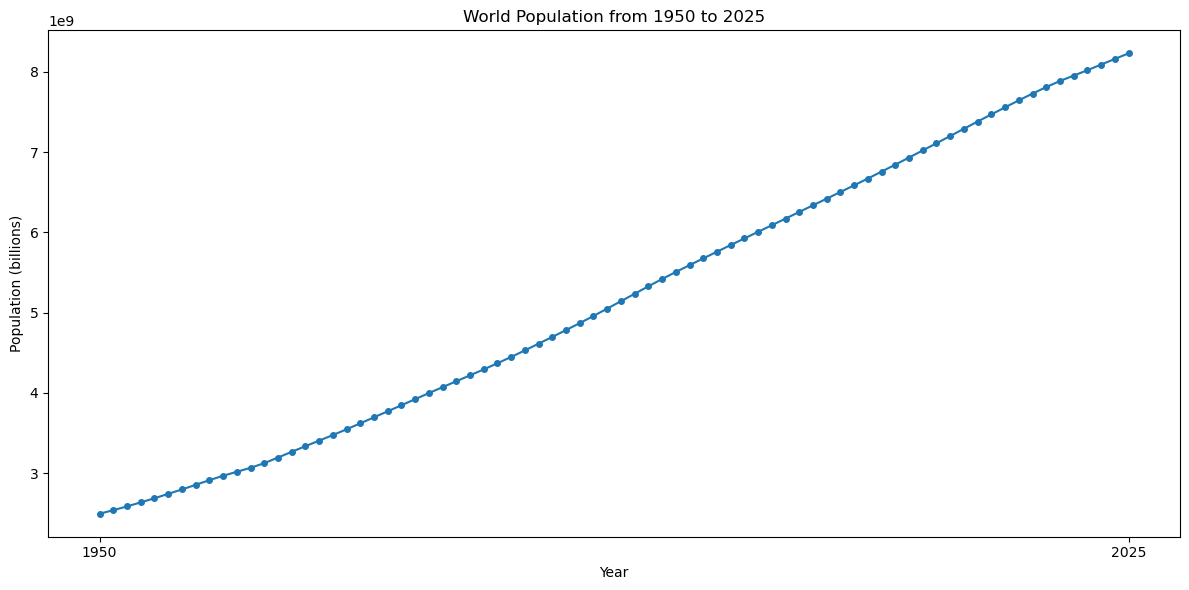

In [19]:
table3_filtered = table3[(table3['Year'] >= 1950) & (table3['Year'] <= 2025)]

plt.figure(figsize=(12,6))
plt.plot(table3_filtered['Year'], table3_filtered['Population'], marker='o', markersize=4)


tick_positions = [
    table3_filtered['Year'].iloc[0],   
    table3_filtered['Year'].iloc[-1]  
]

plt.xticks(tick_positions)
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.title('World Population from 1950 to 2025')
plt.tight_layout()
plt.show()


#### Conclusion: As we can see in the graoh, the total population had a steady, linear growth. There isn't any anomalies in the population and it grew from less than 3 billion to more than 8 billion in the past 75 years. 

### Which countries have experienced the largest population growth (percentage-wise) over the past decade?

#### Create table1 table from the dictionary

In [20]:
table1 = data_tables['table1']

#### Print out columns

In [21]:
table1.columns

Index([' #    ', ' Country (or dependency)    ', ' Population 2025    ',
       ' Yearly Change    ', ' Net Change    ', ' Density (P/KmÂ²)    ',
       ' Land Area (KmÂ²)    ', ' Migrants (net)    ', ' Fert. Rate    ',
       ' Median Age    ', ' Urban Pop %    ', ' World Share    '],
      dtype='object')

#### Strip the white space from the column names

In [22]:
table1.columns = table1.columns.str.strip()

#### Drop unnecessary columns

In [23]:
cols_to_drop = ['Population 2025', 'Net Change', 'Density (P/KmÂ²)', 'Land Area (KmÂ²)', 'Migrants (net)',
       'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']

#### Create a new cleaned table1

In [24]:
table1_cleaned  = table1.drop(columns = cols_to_drop)

#### Check columns again

In [25]:
table1_cleaned.columns

Index(['#', 'Country (or dependency)', 'Yearly Change'], dtype='object')

#### Check data types

In [26]:
table1_cleaned.dtypes

#                          object
Country (or dependency)    object
Yearly Change              object
dtype: object

#### Format the percentages

In [27]:
table1_cleaned['Yearly Change'] = table1_cleaned['Yearly Change'].str.replace(r'[^0-9\.-]', '', regex=True)

#### Check table1 cleaned

In [28]:
table1_cleaned

,#,Country (or dependency),Yearly Change
0,1,India,0.89
1,2,China,0.23
2,3,United States,0.54
3,4,Indonesia,0.79
4,5,Pakistan,1.57
...,...,...,...
228,229,Montserrat,0.68
229,230,Falkland Islands,0.03
230,231,Tokelau,4.07
231,232,Niue,0.11


#### Sort the values

In [29]:
top_growth = table1_cleaned.sort_values(by='Yearly Change', ascending = False)

#### Check top growth

In [30]:
top_growth

,#,Country (or dependency),Yearly Change
230,231,Tokelau,4.07
121,122,Oman,4.04
56,57,Syria,3.84
63,64,Chad,3.47
120,121,Central African Republic,3.43
...,...,...,...
31,32,Spain,0.04
217,218,San Marino,0.03
130,131,Georgia,0.03
229,230,Falkland Islands,0.03


#### Make top growth the top 10 countries

In [31]:
top_growth = top_growth.head(10)

#### Check the top growth

In [32]:
top_growth

,#,Country (or dependency),Yearly Change
230,231,Tokelau,4.07
121,122,Oman,4.04
56,57,Syria,3.84
63,64,Chad,3.47
120,121,Central African Republic,3.43
66,67,Somalia,3.4
221,222,Cook Islands,3.39
216,217,Marshall Islands,3.37
53,54,Niger,3.28
14,15,DR Congo,3.25


#### Sort from lowest to highest for graph

In [33]:
top_growth_sorted = top_growth.sort_values(by='Yearly Change', ascending=True)

#### Plot the top 10

/var/folders/3t/4w3jv2k529q0km6xnhcd0ntc0000gn/T/ipykernel_25367/129380789.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


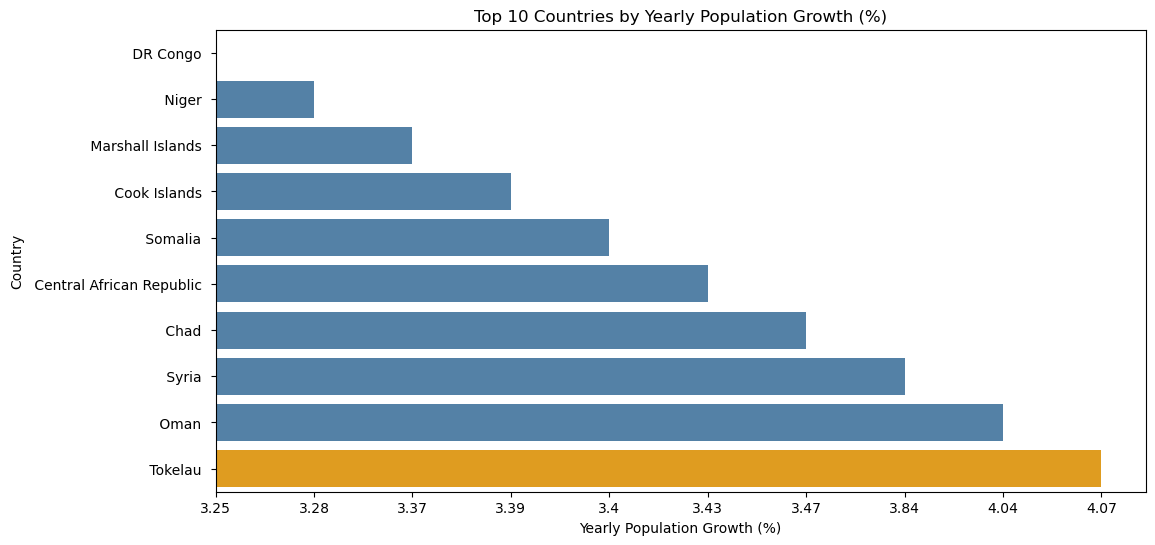

In [34]:
plt.figure(figsize=(12,6))

colors = ['steelblue' if country != ' Tokelau ' else 'orange'
          for country in top_growth_sorted['Country (or dependency)']]

sns.barplot(
    data=top_growth_sorted,
    x='Yearly Change',
    y='Country (or dependency)',
    orient='h',
    palette=colors
)

plt.title('Top 10 Countries by Yearly Population Growth (%)')
plt.xlabel('Yearly Population Growth (%)')
plt.ylabel('Country')

#so x axis is decreasing to increasing
ax = plt.gca()
current_ticks = ax.get_xticks()
sorted_ticks = sorted(current_ticks)
ax.set_xticks(sorted_ticks)

plt.show()


#### Conclusion: Tokelau has the highest yearly population growth with a percentage of 4.07.

### Is there a relationship between population density and total population size?

#### Check the columns

In [35]:
table1.columns

Index(['#', 'Country (or dependency)', 'Population 2025', 'Yearly Change',
       'Net Change', 'Density (P/KmÂ²)', 'Land Area (KmÂ²)', 'Migrants (net)',
       'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share'],
      dtype='object')

#### Drop unneeded columns

In [36]:
cols_drop_2 = ['Yearly Change', 'Net Change', 'Land Area (KmÂ²)', 'Migrants (net)',
       'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']

In [37]:
table1_cleaned2 = table1.drop(columns = cols_drop_2)

In [38]:
table1_cleaned2.columns

Index(['#', 'Country (or dependency)', 'Population 2025', 'Density (P/KmÂ²)'], dtype='object')

#### Check data types

In [39]:
table1_cleaned2.dtypes

#                          object
Country (or dependency)    object
Population 2025            object
Density (P/KmÂ²)           object
dtype: object

In [40]:
table1_cleaned2

,#,Country (or dependency),Population 2025,Density (P/KmÂ²)
0,1,India,"1,463,865,525",492
1,2,China,"1,416,096,094",151
2,3,United States,"347,275,807",38
3,4,Indonesia,"285,721,236",158
4,5,Pakistan,"255,219,554",331
...,...,...,...,...
228,229,Montserrat,"4,359",44
229,230,Falkland Islands,"3,469",0
230,231,Tokelau,"2,608",261
231,232,Niue,"1,821",7


#### Remove the commas from the values and convert data type to float for density

In [41]:
table1_cleaned2['Density (P/KmÂ²)'] = table1_cleaned2['Density (P/KmÂ²)'].str.replace(',', '')

In [42]:
table1_cleaned2['Density (P/KmÂ²)'] = table1_cleaned2['Density (P/KmÂ²)'].astype(float)

In [43]:
table1_cleaned2

,#,Country (or dependency),Population 2025,Density (P/KmÂ²)
0,1,India,"1,463,865,525",492.0
1,2,China,"1,416,096,094",151.0
2,3,United States,"347,275,807",38.0
3,4,Indonesia,"285,721,236",158.0
4,5,Pakistan,"255,219,554",331.0
...,...,...,...,...
228,229,Montserrat,"4,359",44.0
229,230,Falkland Islands,"3,469",0.0
230,231,Tokelau,"2,608",261.0
231,232,Niue,"1,821",7.0


#### Remove commas from the numbers and convert to int

In [44]:
table1_cleaned2['Population 2025'] = table1_cleaned2['Population 2025'].str.replace(',', '')

In [45]:
table1_cleaned2['Population 2025'] = table1_cleaned2['Population 2025'].astype(int)

In [46]:
table1_cleaned2.dtypes

#                           object
Country (or dependency)     object
Population 2025              int64
Density (P/KmÂ²)           float64
dtype: object

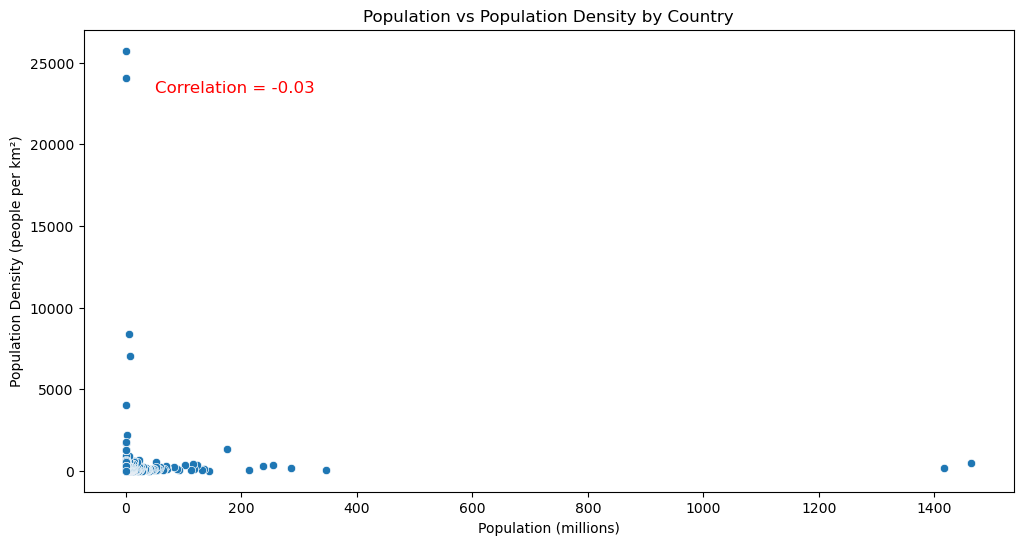

In [47]:
#correlation coefficient
corr = table1_cleaned2['Population 2025'].corr(table1_cleaned2['Density (P/KmÂ²)'])

plt.figure(figsize=(12,6))

sns.scatterplot(
    data=table1_cleaned2,
    x=table1_cleaned2['Population 2025']/1000000,  #population in millions
    y='Density (P/KmÂ²)'
)

plt.xlabel('Population (millions)')
plt.ylabel('Population Density (people per km²)')
plt.title('Population vs Population Density by Country')


plt.text(
    x=50, 
    y=max(table1_cleaned2['Density (P/KmÂ²)'])*0.9,
    s=f'Correlation = {corr:.2f}',
    fontsize=12,
    color='red'
)

plt.show()


#### Conclusion: The correlation coefficient is -0.03, meaning that there is no definite correlation of population density and total population size beacuse the number is very close to 0.

### Which continents contribute the most to global population growth?

In [48]:
table2 = data_tables['table2']

In [49]:
table2

,#,Continent,Population 2025,Area (KmÂ²),Density (P/KmÂ²),World Share
0,1,Asia,"4,835,320,061","31,033,131",156,58.7%
1,2,Africa,"1,549,867,585","29,648,481",52,18.8%
2,3,Europe,"742,556,239","22,134,710",34,9%
3,4,North America,"617,286,638","21,329,947",29,7.5%
4,5,South America,"438,105,376","17,461,112",25,5.3%
5,6,Australia/Oceania,"46,609,644","8,486,460",5,0.6%
6,7,Antarctica,0,"13,720,000",0,0%


In [50]:
table2.dtypes

#                    object
Continent            object
Population 2025      object
Area (KmÂ²)          object
Density (P/KmÂ²)     object
World Share          object
dtype: object

In [51]:
table2.columns

Index([' # ', ' Continent ', ' Population 2025 ', ' Area (KmÂ²) ',
       ' Density (P/KmÂ²) ', ' World Share '],
      dtype='object')

#### Strip whitespace from columns

In [52]:
table2.columns = table2.columns.str.strip()

In [53]:
table2.columns

Index(['#', 'Continent', 'Population 2025', 'Area (KmÂ²)', 'Density (P/KmÂ²)',
       'World Share'],
      dtype='object')

#### Drop unneeded columns

In [54]:
cols_to_drop = ['Area (KmÂ²)', 'Density (P/KmÂ²)',
       'World Share']

In [55]:
table2_cleaned  = table2.drop(columns = cols_to_drop)

In [56]:
table2_cleaned

,#,Continent,Population 2025
0,1,Asia,"4,835,320,061"
1,2,Africa,"1,549,867,585"
2,3,Europe,"742,556,239"
3,4,North America,"617,286,638"
4,5,South America,"438,105,376"
5,6,Australia/Oceania,"46,609,644"
6,7,Antarctica,0


#### Check data types

In [57]:
table2_cleaned.dtypes

#                  object
Continent          object
Population 2025    object
dtype: object

#### Clean the population column by removing commas and setting the type to int

In [58]:
table2_cleaned["Population 2025"] = table2_cleaned["Population 2025"].str.replace(",", "").astype(int)

In [59]:
table2_cleaned["Population 2025"] = table2_cleaned["Population 2025"].astype(int)

#### Plot the values

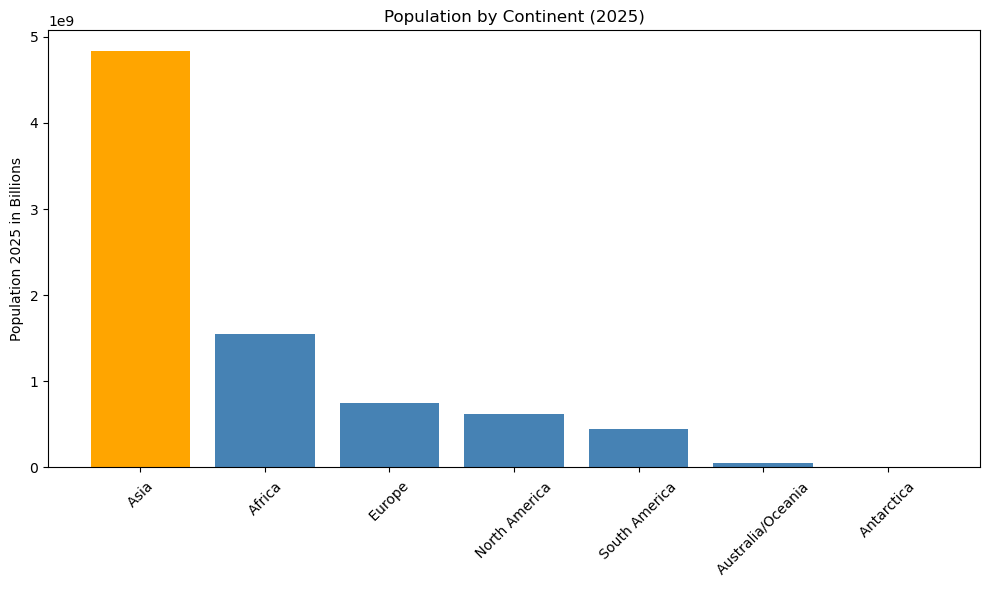

In [60]:
plt.figure(figsize=(10,6))

colors = ["orange" if c == " Asia " else "steelblue" 
          for c in table2_cleaned["Continent"]]

plt.bar(table2_cleaned["Continent"], 
        table2_cleaned["Population 2025"], 
        color=colors)

plt.xticks(rotation=45)
plt.ylabel("Population 2025 in Billions")
plt.title("Population by Continent (2025)")
plt.tight_layout()
plt.show()


#### Conclusion: Asia contributes to the highest population growth, with close to 5 billion people. Africa is next, with around 1.5 billion people.

##### Sources: Seaborn: https://www.geeksforgeeks.org/python/python-seaborn-tutorial
#####          Removing commas: https://hackernoon.com/how-to-remove-commas-from-string-python